# Plotting energies of 2d scan performed in MNDO.
# read in data.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ndih = 180
npyr = 41
name = "56pfine"
eshift = 3742.   #set arbitrary energy zero point to make plot nicer.
ev2kcalmol = 23.

dih = np.genfromtxt("/home/winter/onsager/tsqm/%s/alldih.dat" %name, delimiter=' ', skip_header=0, skip_footer=0)
e1 = np.genfromtxt("/home/winter/onsager/tsqm/%s/allE1.dat" %name, delimiter=' ', skip_header=0, skip_footer=0)
e2 = np.genfromtxt("/home/winter/onsager/tsqm/%s/allE2.dat" %name, delimiter=' ', skip_header=0, skip_footer=0)
# Replace 0 by nan, utilizing the feature that matplotlib won't plot nan.
e1[ e1==0 ] = np.nan
e2[ e2==0 ] = np.nan
e1 = ev2kcalmol*(eshift+e1)
e2 = ev2kcalmol*(eshift+e2)
pyr0 = np.genfromtxt("/home/winter/onsager/tsqm/%s/pyramid.dat" %name, delimiter=' ', skip_header=0, skip_footer=0)
pyr = np.repeat(pyr0,ndih)

# x,y,z1,z2 contain the same data as the .dat loaded above, but rearranging to satisfy matplotlib input requirements
x = np.linspace(-360,0,num=ndih,endpoint=False)
y = np.linspace(-40,40,num=npyr,endpoint=True)
x,y = np.meshgrid(x,y)
z1 = np.reshape(e1,(npyr,ndih))
z2 = np.reshape(e2,(npyr,ndih))


# xa = np.copy(x[:,0:ndih//2])
# xb = np.copy(x[:,ndih//2:ndih])
# ya = np.copy(y[:,0:ndih//2])
# yb = np.copy(y[:,ndih//2:ndih])
# z1a = np.flipud(z1[:,0:ndih//2])
# z1b = np.copy(z1[:,ndih//2:ndih])
# z2a = np.flipud(z2[:,0:ndih//2])
# z2b = np.copy(z2[:,ndih//2:ndih])
# z1m = np.fmin(z1a, z1b)
# z2m = np.fmin(z2a, z2b)

# Plot pseudocolor map, 360 raw surface, followed by 180 surface combining two 180 halves: 
## (in pseudocolor map, if x,y,z have the same dimension, last row and column of z are ignored )

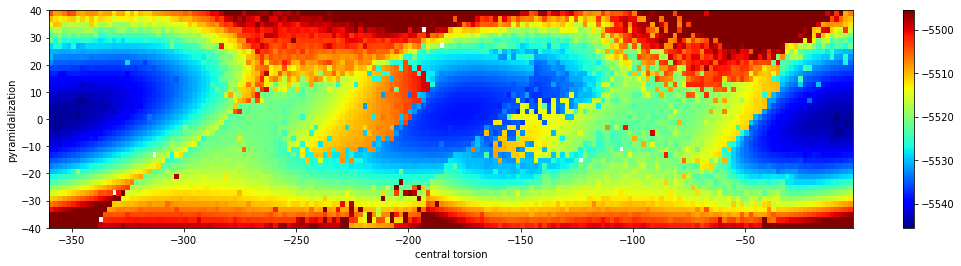

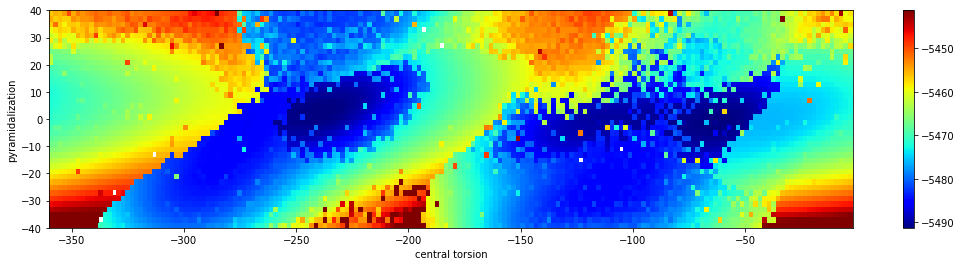

In [68]:
plt.figure(figsize=(18,4))
plt.pcolor(x, y, z1, cmap='jet', vmin=np.nanmin(z1), vmax=np.nanmin(z1)+50)
plt.colorbar()
plt.xlabel('central torsion')
plt.ylabel('pyramidalization')
plt.show()

plt.figure(figsize=(18,4))
plt.pcolor(x, y, z2, cmap='jet', vmin=np.nanmin(z2), vmax=np.nanmin(z2)+50)
plt.colorbar()
plt.xlabel('central torsion')
plt.ylabel('pyramidalization')
plt.show()

Note: for motor 56, P has dihedral ~0.2 (experimetal); M has dihedral ~177.6 (DFT opted.)

# Another plot, contourf, for scan a: 
## (contourf doesn't ignore last column and row of z.)

<Figure size 432x288 with 0 Axes>

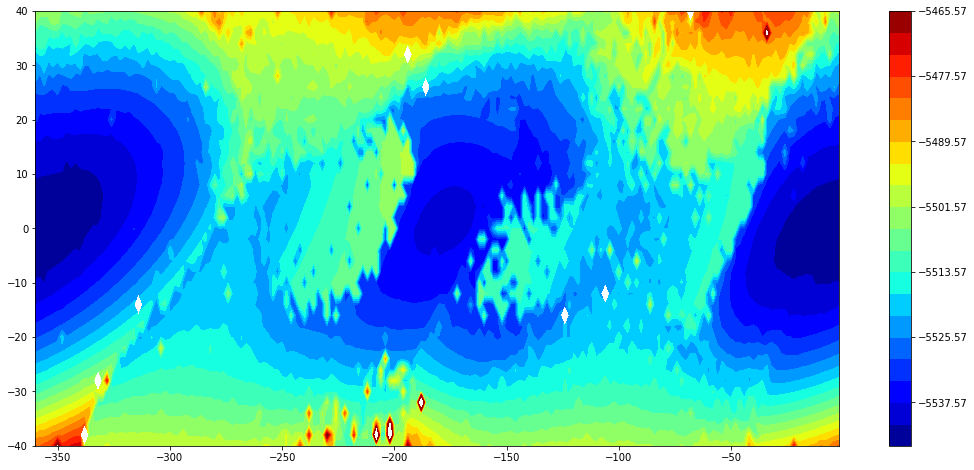

<Figure size 432x288 with 0 Axes>

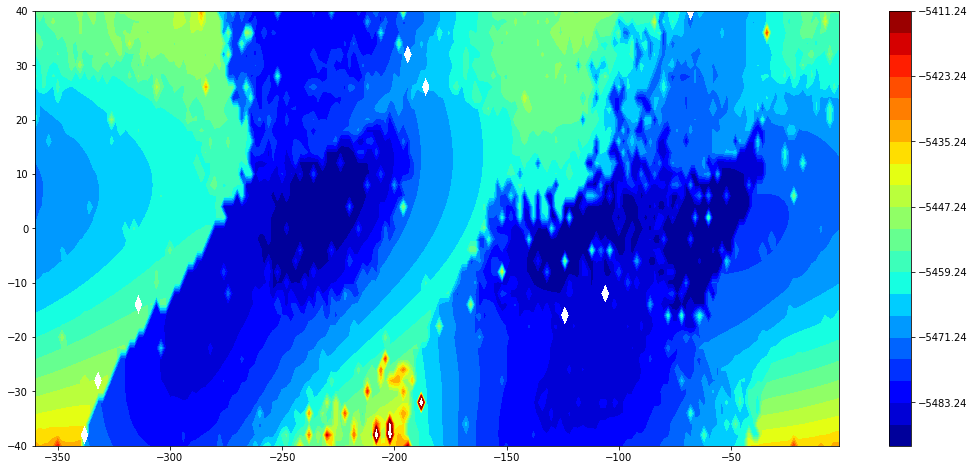

<Figure size 432x288 with 0 Axes>

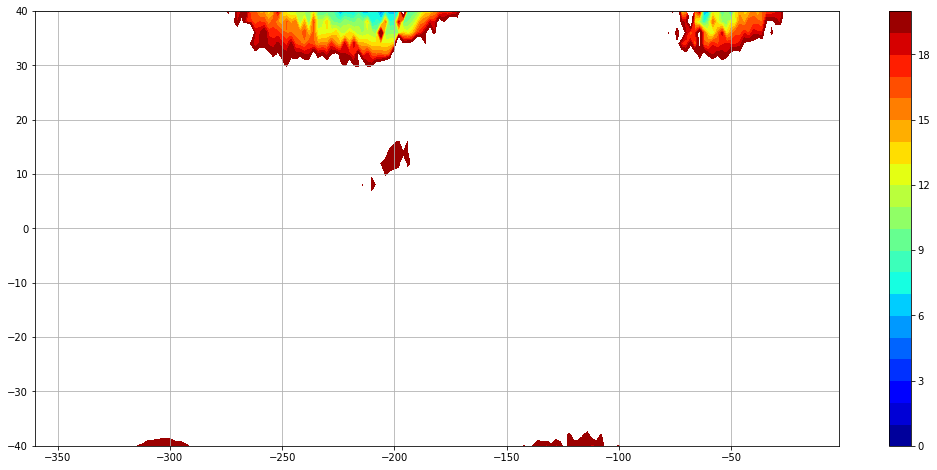

<Figure size 432x288 with 0 Axes>

In [69]:


plt.figure(figsize=(18,8))
# Manually setting vmin vmax to make my plot look closer to Pang's. If my QM calculation were perfect then I may not need.
levels = np.linspace(np.nanmin(z1),np.nanmin(z1)+80,num=21,endpoint=True)
CS = plt.contourf(x, y, z1, levels, cmap=plt.cm.jet)
plt.colorbar()
plt.figure()

plt.figure(figsize=(18,8))
# Manually setting vmin vmax to make my plot look closer to Pang's. If my QM calculation were perfect then I may not need.
levels = np.linspace(np.nanmin(z2),np.nanmin(z2)+80,num=21,endpoint=True)
CS = plt.contourf(x, y, z2, levels, cmap=plt.cm.jet)
plt.colorbar()
plt.figure()

plt.figure(figsize=(18,8))
# Manually setting vmin vmax to make my plot look closer to Pang's. If my QM calculation were perfect then I may not need.
levels = np.linspace(0,20,num=21,endpoint=True)
CS = plt.contourf(x, y, z2-z1, levels, cmap=plt.cm.jet)
plt.colorbar()
plt.grid(True)
plt.figure()

# Comparing to Pang's plot, which I'm trying to reproduce

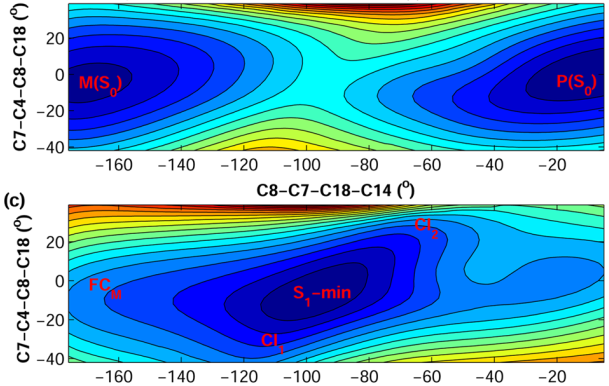

In [30]:
from IPython.display import Image
Image(filename='/home/winter/Desktop/PangPlot.png')